In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, f1_score


In [2]:
# Load datasets
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")


In [3]:
# Data overview
print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")


Dataset shape: (100000, 76)
Missing values:
MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64


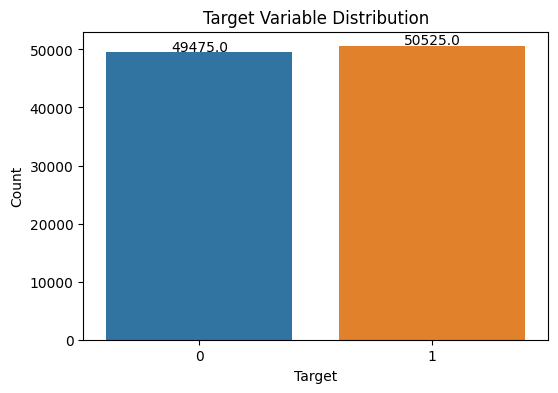

In [4]:
# Visualizing the target variable distribution(Countplot)
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 4), textcoords='offset points')
plt.show()

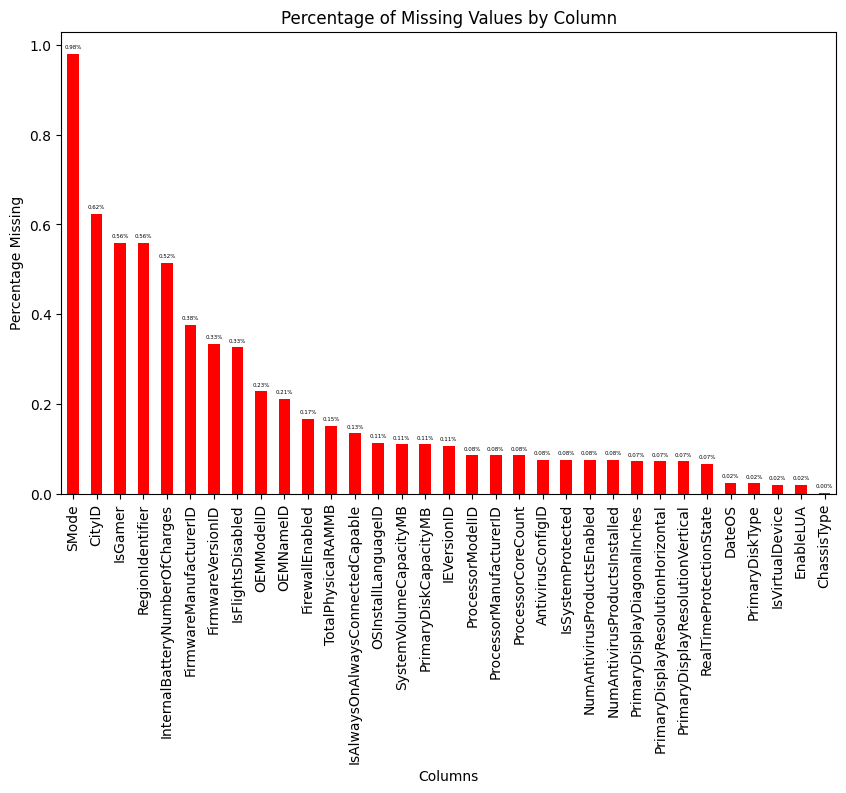

In [5]:
# Calculate the missing data percentage
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plot the missing data as a bar chart
plt.figure(figsize=(10, 6))
ax = missing_data.plot(kind='bar', color='red')

# Add the missing percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', 
                va='center',  
                fontsize=4,  
                color='black',  
                xytext=(0, 5),  
                textcoords='offset points' 
                )

# Add labels and title
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage Missing")
plt.xlabel("Columns")

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


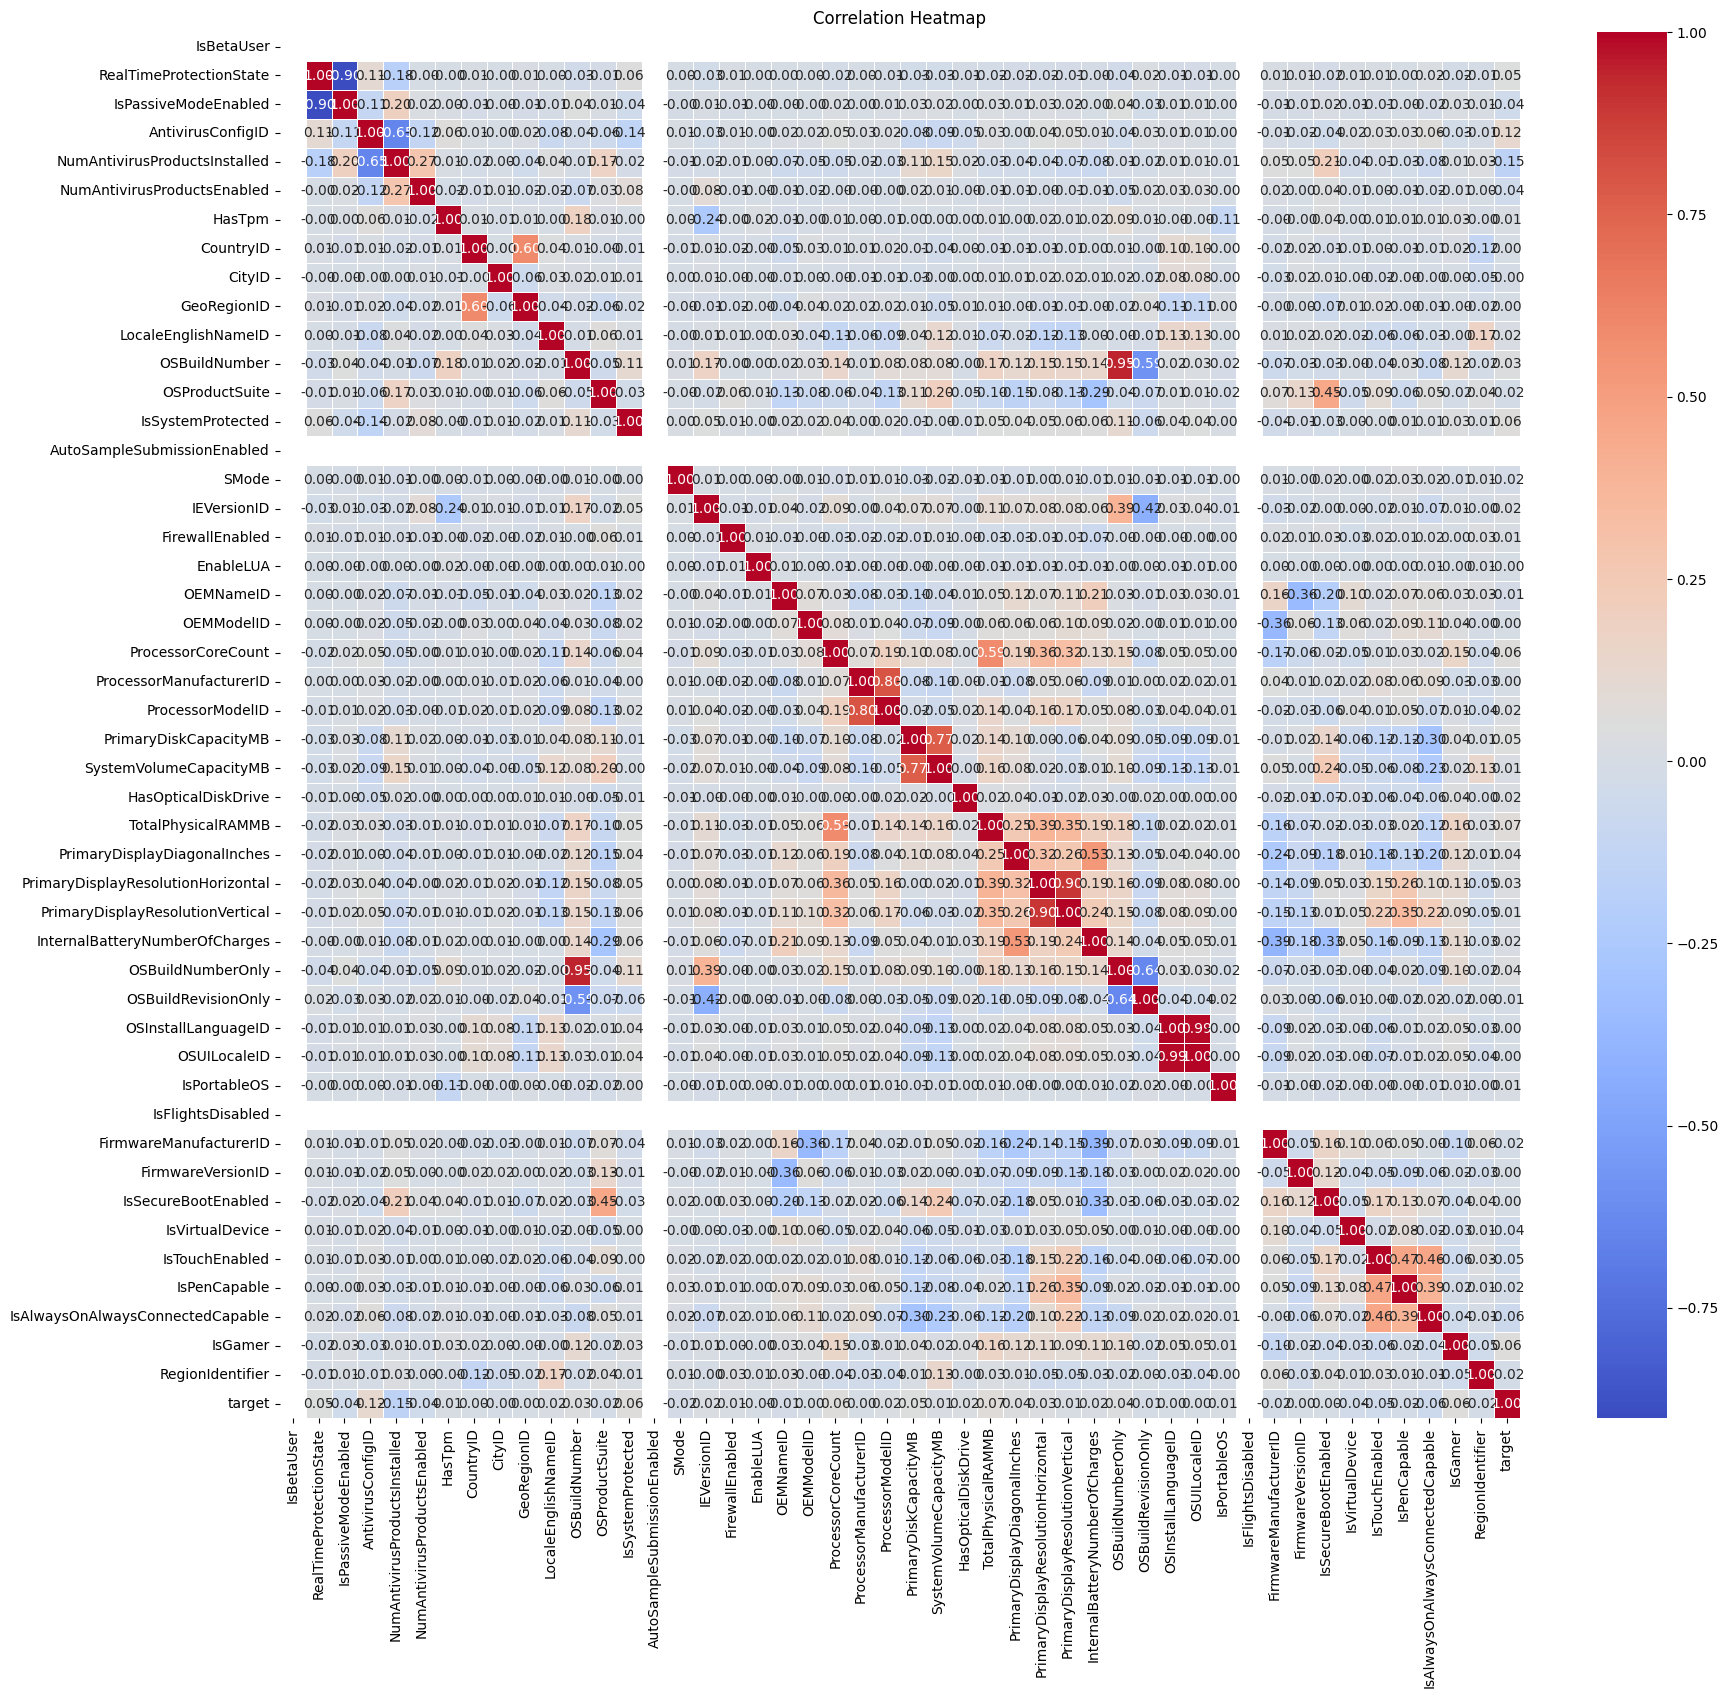

In [6]:
#Corelation Matrix

num_features=df.select_dtypes(include=['number'])
correlation_matrix=num_features.corr()

plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

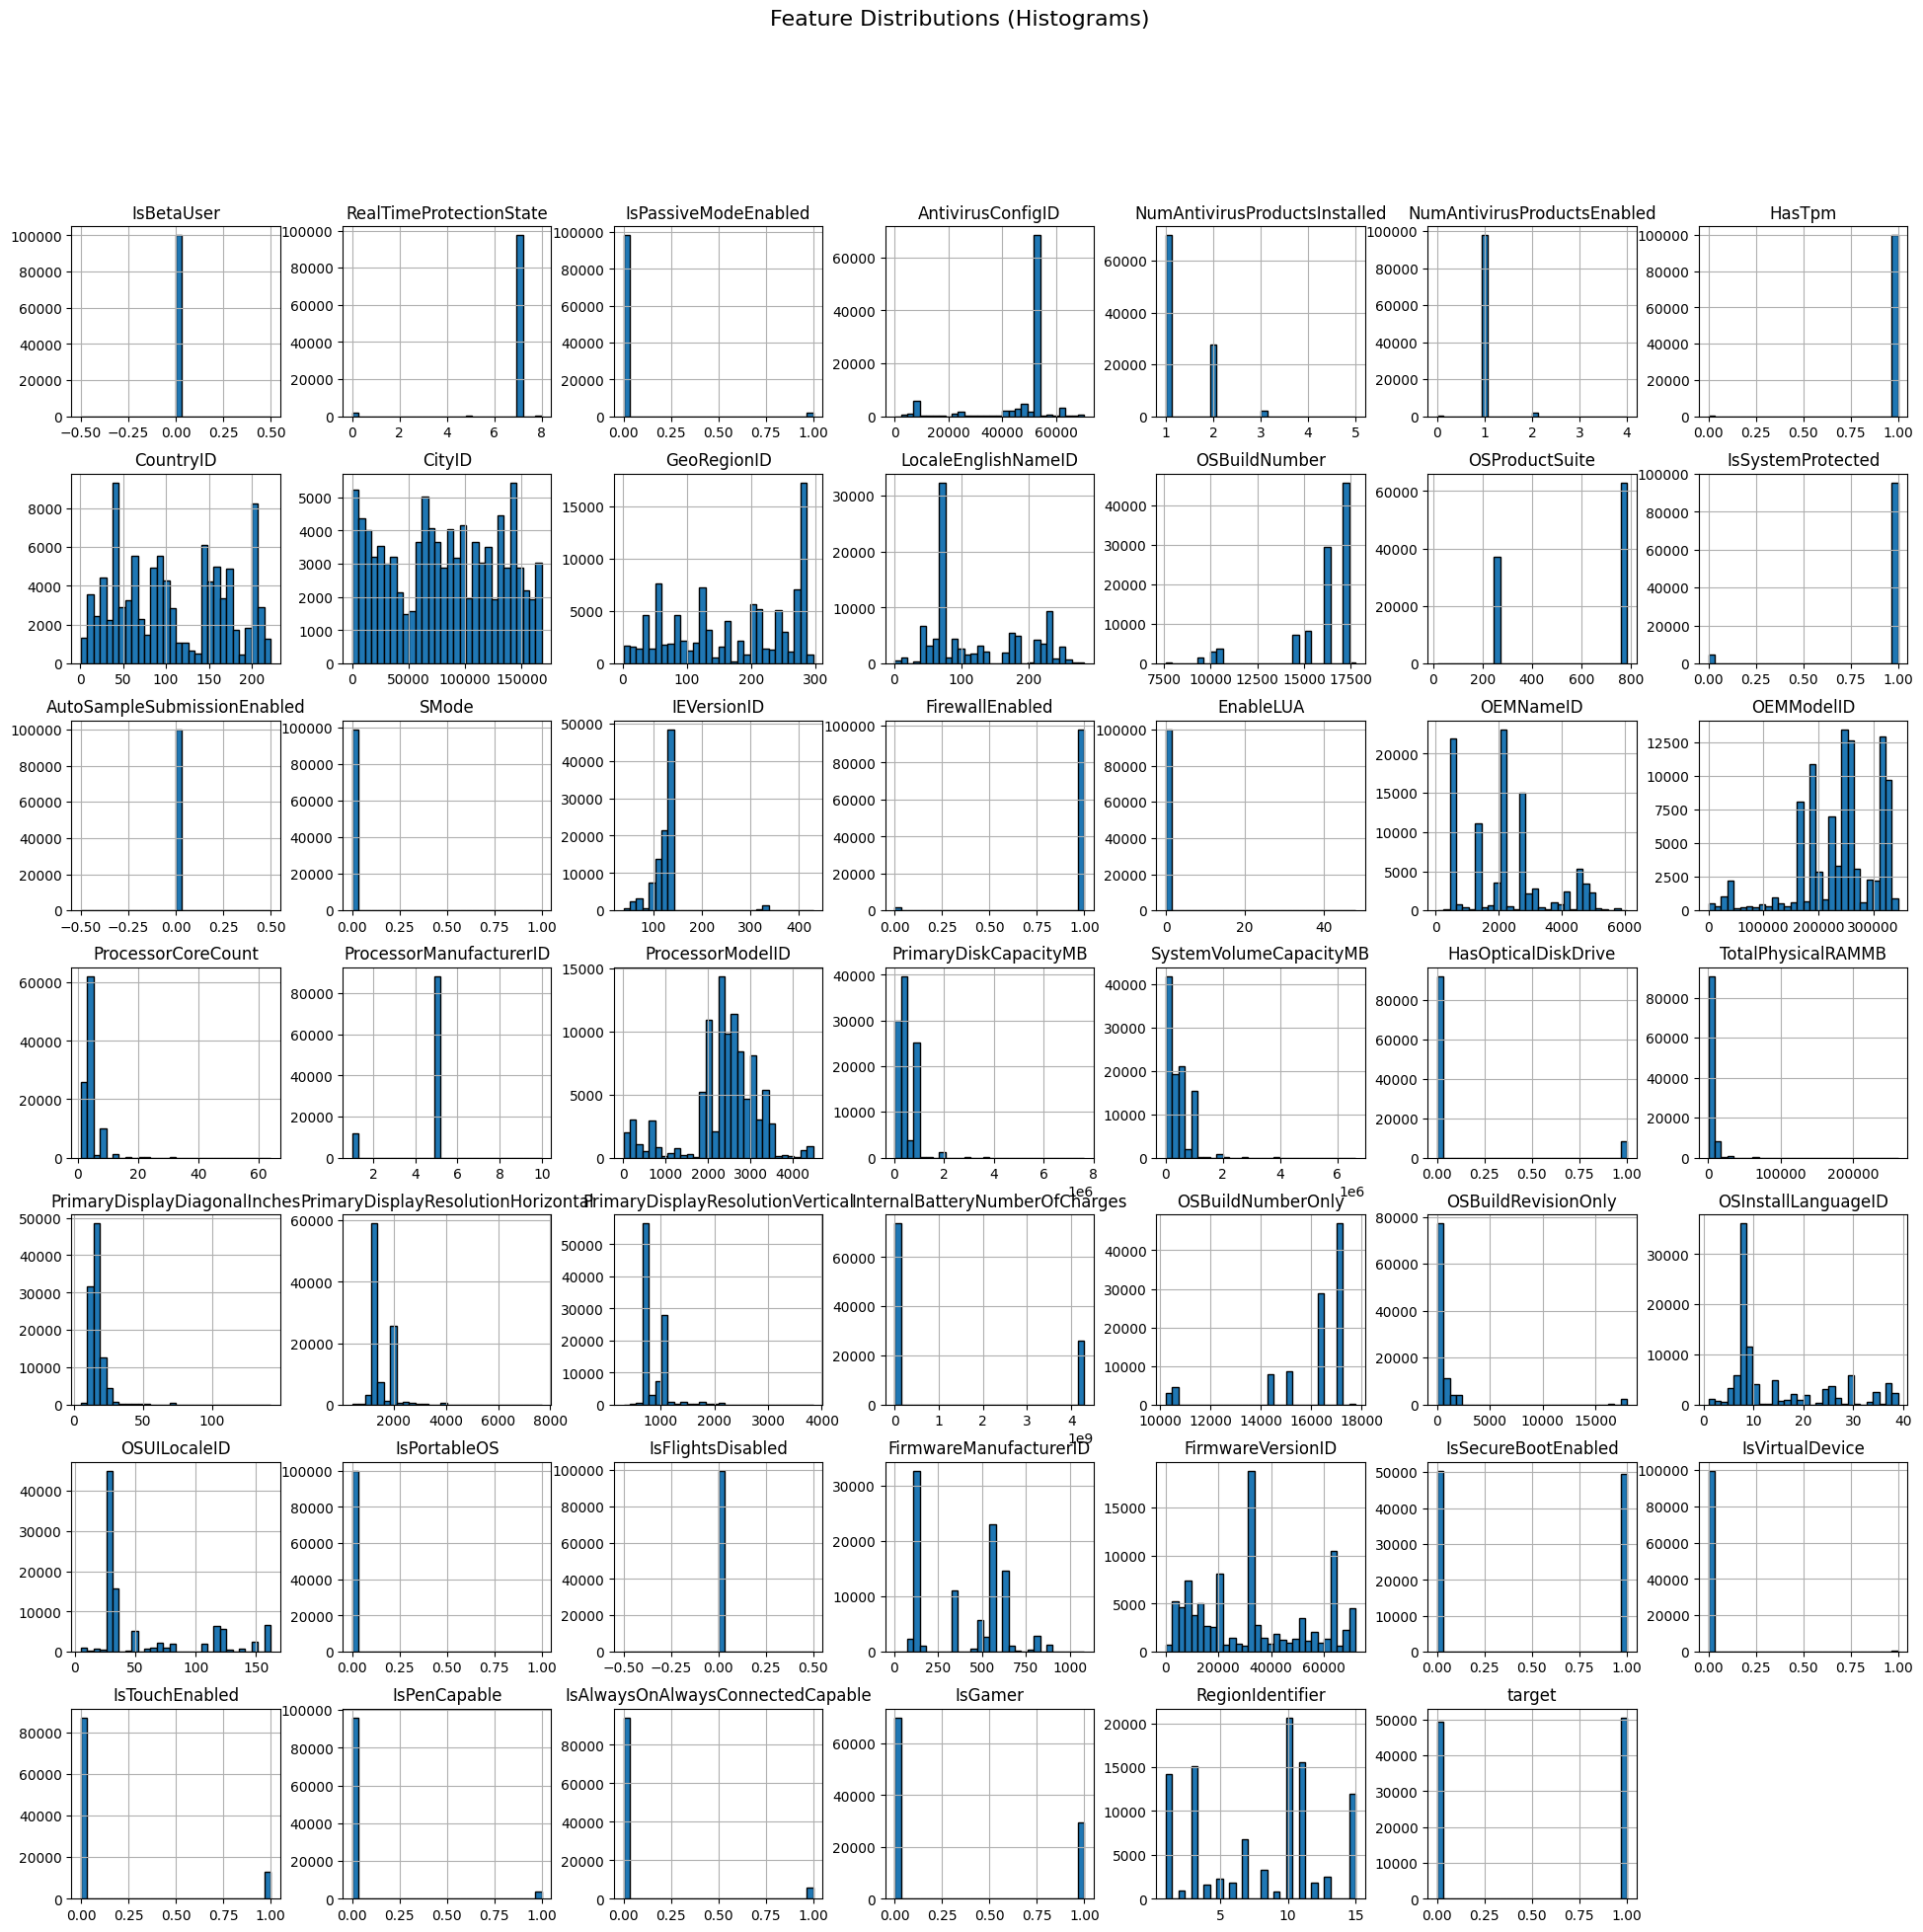

In [7]:
numerical_df = df.select_dtypes(include=['number'])

# Plot histograms for numerical features
numerical_df.hist(figsize=(24 ,22), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


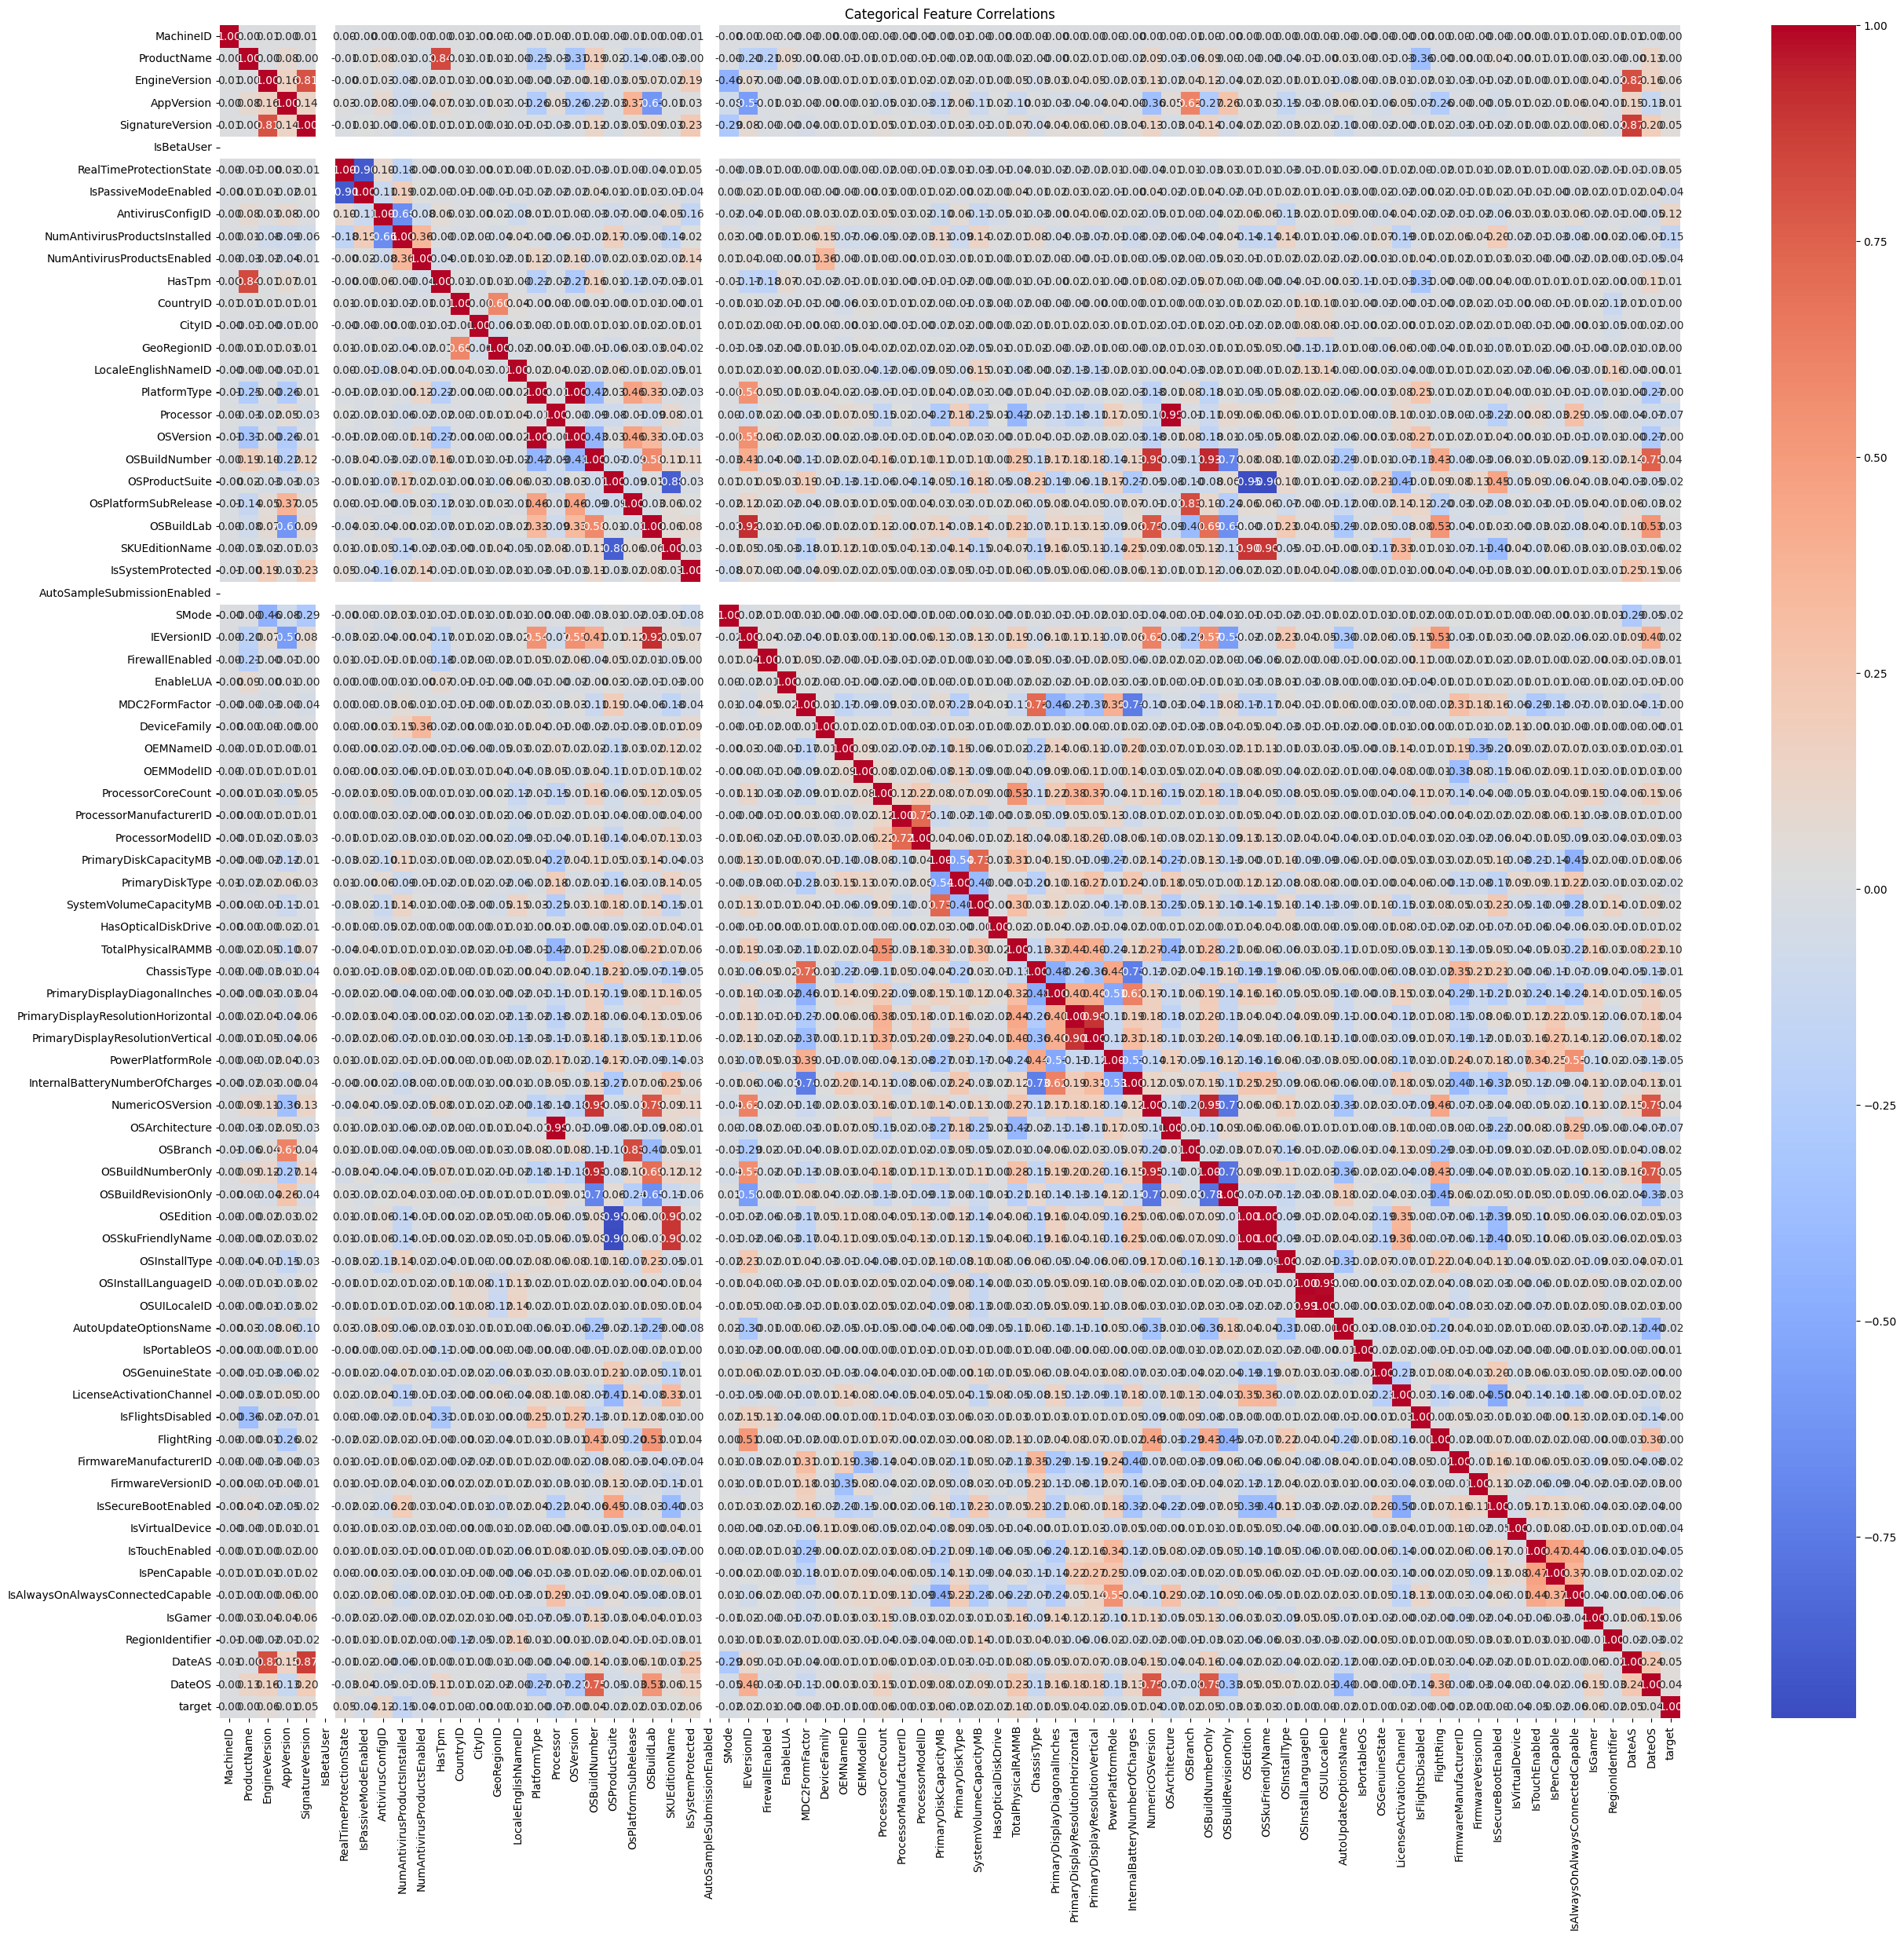

In [8]:
#Categorical columns in a heatmap
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
for col in encoded_df.columns:
    label_encoder = LabelEncoder()
    encoded_df[col] = label_encoder.fit_transform(df[col])

# Plot correlation heatmap
plt.figure(figsize=(30,28))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Categorical Feature Correlations")
plt.show()

In [9]:
# Remove irrelevant columns
X = df.drop(columns=['target', 'MachineID'], errors='ignore')  
y = df['target']



In [10]:

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()



In [11]:
# Numerical data processing
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical data processing
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [12]:

# Combining preprocessor into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


In [13]:
#Performing the train test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [14]:
# Define the pipeline for randomforest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [15]:
# Define hyperparameter grid(Random Forest Classifier)
rf_param_grid = {
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [16]:
# GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['IsBetaUser',
                                                                          'RealTimeProtectionState',
                                                                          'IsPassiveModeEnabled',
                                                                          'AntivirusConfigID',
                                                                          'NumAntivirusProductsInstalled',
                                                                          'NumAntivirusProductsEnabled',
                                                                          'HasTpm',
                                                                          'CountryID',
                                                                          'CityID',
                                                                          'G...
                                                                          'OSEdition',
                                                                          'OSSkuFriendlyName',
                                                                          'OSInstallType',
                                                                          'AutoUpdateOptionsName',
                                                                          'OSGenuineState',
                                                                          'LicenseActivationChannel',
                                                                          'FlightRing',
                                                                          'DateAS',
                                                                          'DateOS'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='accuracy')

In [17]:
# Best Random Forest Model
print(f"Best parameters for RandomForest: {rf_grid_search.best_params_}")
rf_best_model = rf_grid_search.best_estimator_

Best parameters for RandomForest: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


In [18]:
# Make predictions
y_prediction = rf_best_model.predict(X_test)


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Predicting on the test dataset
test_predictions= rf_best_model.predict(x_test)

Accuracy: 0.62
Precision: 0.62
F1 Score: 0.65


In [20]:
# Define the pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [21]:
# Define hyperparameter grid
dt_param_grid = {
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [22]:

# GridSearchCV for hyperparameter tuning
dt_grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['IsBetaUser',
                                                                          'RealTimeProtectionState',
                                                                          'IsPassiveModeEnabled',
                                                                          'AntivirusConfigID',
                                                                          'NumAntivirusProductsInstalled',
                                                                          'NumAntivirusProductsEnabled',
                                                                          'HasTpm',
                                                                          'CountryID',
                                                                          'CityID',
                                                                          'G...
                                                                          'OSEdition',
                                                                          'OSSkuFriendlyName',
                                                                          'OSInstallType',
                                                                          'AutoUpdateOptionsName',
                                                                          'OSGenuineState',
                                                                          'LicenseActivationChannel',
                                                                          'FlightRing',
                                                                          'DateAS',
                                                                          'DateOS'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='accuracy')

In [23]:
# Best Decision Tree Model
print(f"Best parameters for DecisionTree: {dt_grid_search.best_params_}")
dt_best_model = dt_grid_search.best_estimator_


Best parameters for DecisionTree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [24]:
# Make predictions
y_prediction = dt_best_model.predict(X_test)


In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Predicting on the test dataset
test_predictions= dt_best_model.predict(x_test)

Accuracy: 0.61
Precision: 0.61
F1 Score: 0.62


In [26]:
# Define the pipeline
lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])

In [27]:
# Define hyperparameter grid
lg_param_grid = {
    'classifier__C': [0.01,1,10],
    'classifier__penalty': ['l1','l2'],
    'classifier__solver': ['saga']
    
}

In [28]:

# GridSearchCV for hyperparameter tuning
lg_grid_search = GridSearchCV(
    estimator=lg_pipeline,
    param_grid=lg_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
lg_grid_search.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['IsBetaUser',
                                                                          'RealTimeProtectionState',
                                                                          'IsPassiveModeEnabled',
                                                                          'AntivirusConfigID',
                                                                          'NumAntivirusProductsInstalled',
                                                                          'NumAntivirusProductsEnabled',
                                                                          'HasTpm',
                                                                          'CountryID',
                                                                          'CityID',
                                                                          'G...
                                                                          'OSArchitecture',
                                                                          'OSBranch',
                                                                          'OSEdition',
                                                                          'OSSkuFriendlyName',
                                                                          'OSInstallType',
                                                                          'AutoUpdateOptionsName',
                                                                          'OSGenuineState',
                                                                          'LicenseActivationChannel',
                                                                          'FlightRing',
                                                                          'DateAS',
                                                                          'DateOS'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['saga']},
             scoring='accuracy')

In [29]:
# Best Decision Tree Model
print(f"Best parameters for DecisionTree: {lg_grid_search.best_params_}")
lg_best_model = lg_grid_search.best_estimator_


Best parameters for DecisionTree: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}


In [30]:
# Make predictions
y_prediction = lg_best_model.predict(X_test)


In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Predicting on the test dataset
test_predictions= lg_best_model.predict(x_test)

Accuracy: 0.62
Precision: 0.61
F1 Score: 0.64


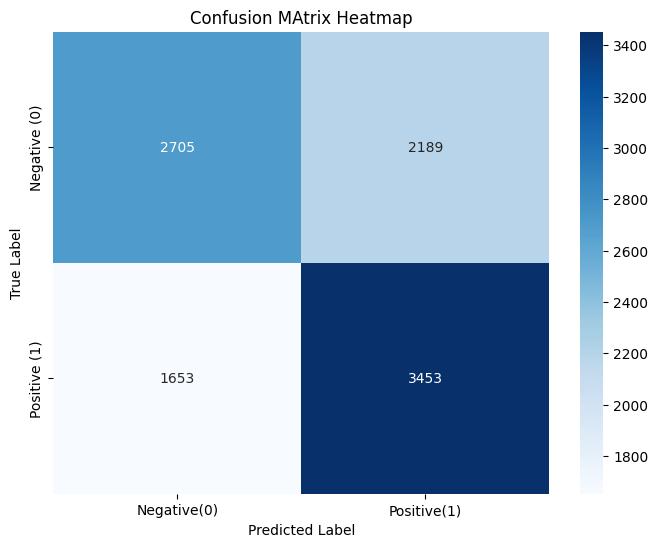

Classification_report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58      4894
           1       0.61      0.68      0.64      5106

    accuracy                           0.62     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.62      0.61     10000



In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_prediction)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Negative(0)','Positive(1)'],yticklabels=['Negative (0)', 'Positive (1)'])
plt.title("Confusion MAtrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

print(f"Classification_report:\n", classification_report(y_test,y_prediction))

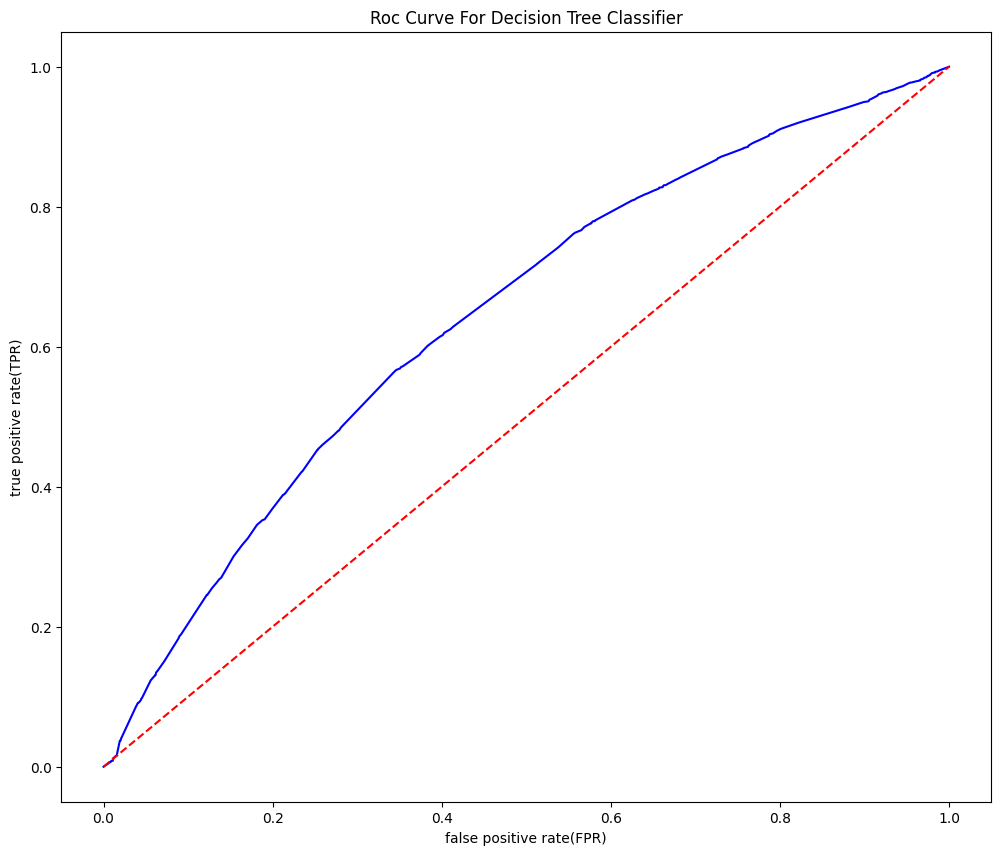

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probability=dt_best_model.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_probability)

auc_score=roc_auc_score(y_test,y_probability)


plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,color='blue',label='Decision Tree Classifier(AUC={auc_score:.2f})')
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("false positive rate(FPR)")
plt.ylabel("true positive rate(TPR)")
plt.title("Roc Curve For Decision Tree Classifier")

plt.show()

In [34]:
# Prepare submission
submission = pd.DataFrame({
    "id": range(0, x_test.shape[0]),
    "target": test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file is ready")

Submission file is ready
